In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from qbstyles import mpl_style

mpl_style(dark=True)
pd.options.display.float_format = "{:.2f}".format

In [37]:
def model_equation(model, feature_names, target_label, variable_as_name=False):
    # Check if model is Keras (has get_weights)
    if hasattr(model, "get_weights"):
        weights = model.get_weights()
        coef = weights[0].flatten()
        intercept = weights[1].item()
    # Else assume it's sklearn
    elif hasattr(model, "coef_") and hasattr(model, "intercept_"):
        coef = model.coef_.flatten()
        intercept = model.intercept_.item() if hasattr(model.intercept_, 'item') else model.intercept_
    else:
        raise ValueError("Unsupported model type")

    # Variable name handling
    if variable_as_name:
        variables = [f"{name}" for name in feature_names]
        y = target_label
    else:
        variables = [f"x{i}" for i in range(1, len(feature_names) + 1)]
        y = "y"
        for variable, feature_name in zip(variables, feature_names):
            print(f"{variable} = {feature_name}")
        print(f"{y} = {target_label}")

    # Construct equation
    terms = [f"{coef[i]:.2f} * {variables[i]}" for i in range(len(coef))]
    equation = f"{y} = {terms[0]}"
    for term in terms[1:]:
        if term.startswith('-'):
            equation += f" - {term[1:]}"
        else:
            equation += f" + {term}"
    equation += f" + {intercept:.2f}" if intercept >= 0 else f" - {-intercept:.2f}"
    return equation


def loss_curve(history, color="blue"):
    plt.plot(history.history['loss'], color=color, label='Training Loss')
    plt.title('Model Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [101]:
x1 = np.linspace(-5, 5)
x2 = np.linspace(-50, 50)

y = 1 * x1 + 1 * x2 + 8

df = pd.DataFrame({
    'x1': x1, 'x2': x2, 'y': y,
})

<Axes: >

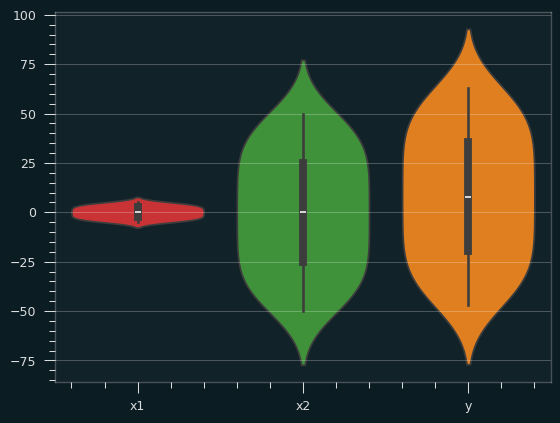

In [102]:
sns.violinplot(df)

In [103]:
features = ['x1', 'x2']
target = 'y'

X, y = df[features], df[target]

sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

LinearRegression()

Model: "keras_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LinearRegression (Dense)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

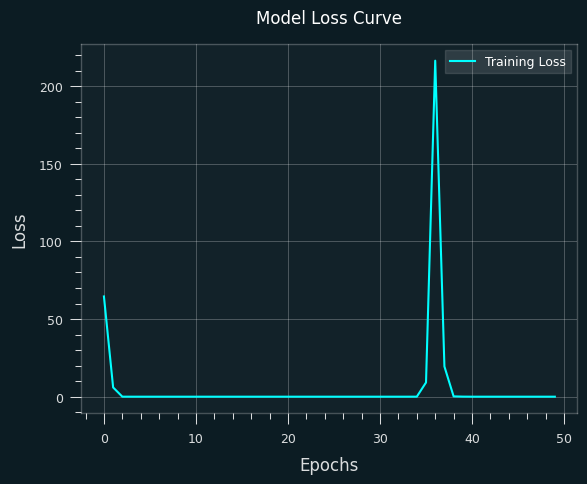

In [106]:
features = ['x1', 'x2']
target = 'y'

X, y = df[features], df[target]

keras_model = Sequential([
    Input(shape=(2,)),
    Dense(1, name="LinearRegression"),
], name="keras_model")

keras_model.compile(loss="mse", optimizer=Adam(learning_rate=0.2) )
keras_model.summary()

history = keras_model.fit(
    x=X, y=y,
    batch_size=1,
    epochs=50,
    verbose=0,
)

loss_curve(history, color="cyan")

In [107]:
sklearn_y_pred = sklearn_model.predict(X)
keras_y_pred = keras_model.predict(X, verbose=0)

sklearn_loss = mean_squared_error(y, sklearn_y_pred)
keras_loss = mean_squared_error(y, keras_y_pred)

sklearn_acc = r2_score(y, sklearn_y_pred) * 100
keras_acc = r2_score(y, keras_y_pred) * 100

sklearn_equation = model_equation(sklearn_model, features, target)
keras_equation = model_equation(keras_model, features, target)

print()
print(f"{sklearn_loss = :.2f}")
print(f"{keras_loss = :.2f}")
print(f"{sklearn_acc = :.2f}")
print(f"{keras_acc = :.2f}")
print()
print(f"{sklearn_equation = }")
print(f"{keras_equation = }")

x1 = x1
x2 = x2
y = y
x1 = x1
x2 = x2
y = y

sklearn_loss = 0.00
keras_loss = 0.00
sklearn_acc = 100.00
keras_acc = 100.00

sklearn_equation = 'y = 0.11 * x1 + 1.09 * x2 + 8.00'
keras_equation = 'y = 0.77 * x1 + 1.02 * x2 + 8.00'


$$
y = 1 \cdot x_1 + 1 \cdot x_2 + 8
$$


In [114]:
print(y[0])
print(X.iloc[0].dot([10, 0.1]) + 8)
print(sklearn_y_pred[0])
print(keras_y_pred[0])

-47.0
-47.0
-47.00000000000002
[-46.999992]
